# ST2 Viral Propagation - An introduction to Random Graphs
Friday, January 19th 2024

## Introduction

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import igraph as ig

## The Erdos-Reny Model

In [14]:
g1 = ig.Graph()

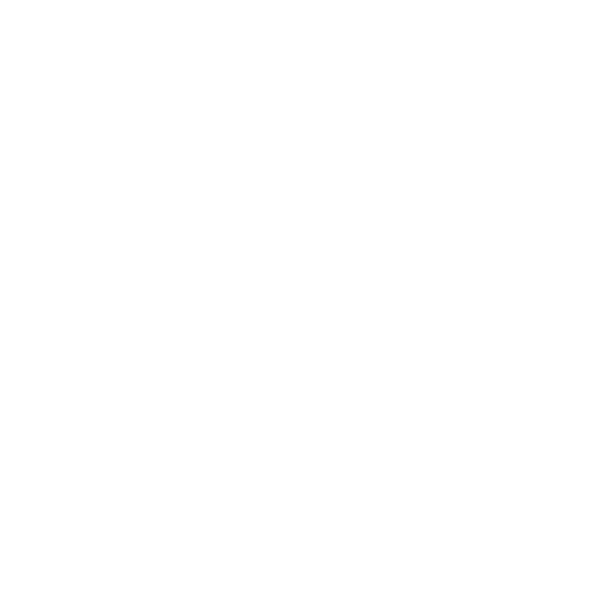

In [15]:
ig.plot(g1)

In [16]:
N = 10

In [17]:
g1.add_vertices(N)

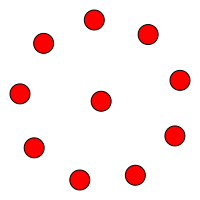

In [18]:
ig.plot(g1,bbox=(200,200))

In [19]:
help(g1.add_vertices)

Help on method _add_vertices in module igraph.basic:

_add_vertices(n, attributes=None) method of igraph.Graph instance
    Adds some vertices to the graph.
    
    Note that if C{n} is a sequence of strings, indicating the names of the
    new vertices, and attributes has a key C{name}, the two conflict. In
    that case the attribute will be applied.
    
    @param n: the number of vertices to be added, or the name of a single
      vertex to be added, or a sequence of strings, each corresponding to the
      name of a vertex to be added. Names will be assigned to the C{name}
      vertex attribute.
    @param attributes: dict of sequences, all of length equal to the
      number of vertices to be added, containing the attributes of the new
      vertices. If n is a string (so a single vertex is added), then the
      values of this dict are the attributes themselves, but if n=1 then
      they have to be lists of length 1.



In [21]:
for i in range(N):
    for j in range(i):
        if rd.randint(0,1) == 1:
            g1.add_edges([(i,j)])

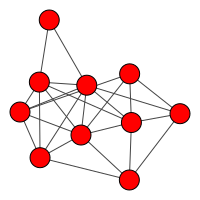

In [22]:
ig.plot(g1,bbox=(200,200))

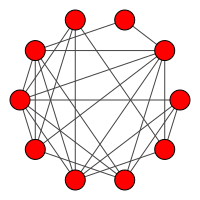

In [23]:
ig.plot(g1,bbox=(200,200),layout='circle')